### Support vector machine with pythone\
##### Breat Cancer data set
###### The data set contains 2 classes: Malignant, Benign type of tumor.

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
plt.show()

##### LOdaing data set


In [37]:
# loding brest cancer data set from slearn
from sklearn.datasets import load_breast_cancer
#lodaing data set as name of dataset
dataset = load_breast_cancer()


##### Availabel keys in data set

In [38]:
print(dataset.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [39]:
print(dataset['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

###### Printing features name and target names

In [40]:
dataset['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [41]:
dataset['target_names']

array(['malignant', 'benign'], dtype='<U9')

##### Creating pandas dataframe for input data frames


In [42]:
df_inputs = pd.DataFrame(dataset['data'],columns=dataset['feature_names'])
df_inputs

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [43]:
df_inputs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [44]:
# dataframe of target classes i.e. malignant or benign
df_output = pd.DataFrame(dataset['target'],columns=['Class'])
df_output

,Class
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


# checking count for each target 


C:\Users\heman\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

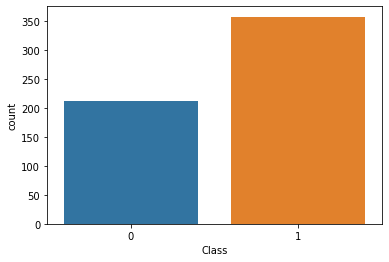

In [45]:
# 0: Malignant
# 1 - beningn
sns.countplot(df_output["Class"]) # which one has more entry in data set 0 or 1

#### Splitting data for training and testing

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
# Splitting data into training and testing data 
# df_input contains the input features
# df_outputs is the dataframe for output classes
X_train,X_test,Y_train,Y_test= train_test_split(df_inputs,df_output['Class'],test_size=0.30,random_state=101)


#### Support vector classifier init, training and prediction 

In [48]:
from sklearn.svm import SVC


In [49]:
model = SVC()

In [50]:
#training model 
model.fit(X_train,Y_train)

SVC()

In [51]:
# Predicting tumor classes for test data
predictions = model.predict(X_test)

##### Creating dataframe to roughly compare actual and output

In [52]:
compare = pd.DataFrame({'Actual':Y_test,'Predictions':predictions})
compare

,Actual,Predictions
107,1,1
437,1,1
195,1,1
141,0,0
319,1,1
...,...,...
420,1,1
279,1,1
390,1,1
91,0,1


##### Model evaluation

In [53]:
from sklearn.metrics import confusion_matrix, classification_report


In [54]:
print(confusion_matrix(Y_test,predictions))

[[ 56  10]
 [  3 102]]


In [55]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90        66
           1       0.91      0.97      0.94       105

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.93      0.92      0.92       171



##### Hyper parameter Tuning using gridsearch 

In [56]:
from sklearn.model_selection import GridSearchCV


In [57]:
#Dictionary containing hyperparameter to be tuned and their values to be tested
grid_parameters= {'C':[0.001,0.1,1,10,100,1000], 'gamma':[0.0001,0.001,0.01,0.1,1,10,100]}


In [59]:
# SCV is a estimator 
# grid parameter from above cell 
#verbose set to greater then 1 to get output message ,when the model is tuned 
grid = GridSearchCV(SVC(),grid_parameters,verbose=1)
    

In [60]:
grid.fit(X_train,Y_train) 

Fitting 5 folds for each of 42 candidates, totalling 210 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.1, 1, 10, 100, 1000],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]},
             verbose=1)

### Prediction using tuned model

In [61]:
grid_predi = grid.predict(X_test)

##### Model evaluation 

In [63]:
print(confusion_matrix(Y_test,grid_predi))

[[ 59   7]
 [  4 101]]


In [64]:
print(classification_report(Y_test,grid_predi))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91        66
           1       0.94      0.96      0.95       105

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



In [65]:
##### Model is improved on predictions